# **Case Study: Fashion Class Classification Using CNN**
<BR>
# **OBJECTIVE**
In this case study we'll look at hypothetical situation. We assume that if a retailer hired you to build a virtual stylist assistance that looks at customer instagram and Facebook images and classifies what fashion category they are wearing either bags dresses and pants. The virtual assistance can help the retailer detect and forecast fashion trends and launch targeted marketing compaigns.

In this story we're going to use the fashionmnist data. It's a data set that contains images of bags shoes and dresses. And we're asking the deep network to classify the images in to 10 classes.

So we wanted to build kind of an app per se or a model. They can look  at images and can tell us exactly what category in this image. Is it like a short? Is it a bag? Is it like a hat? and so on....

## **Problems Statement And Business Case**

Download dataset from here -:
[Fashion Data](https://www.kaggle.com/zalando-research/fashionmnist)
<br>
Fashion training set consists of 70K images devided into 60K training and 10K testing samples. Dataset samples consists of 28X28 grayscale image associated with label from 10 classes

The top 10 classes as fallows:

*   T-Shirt
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandel
*   Shirt
*   Sneaker
*   Bag
*   Ankle Boot

Each Image is 28 pixel in height and 28 pixel in width, for a total of 784 pixels in total. Each pixel has a single Pixel value associated with it, indicating the lightness or darkness of the pixel. Higher number means darker pixel. The pixel value is an integer Between 0 and 255


# **Import The Libraries**



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [6]:
import os 
os.chdir("/content/drive/MyDrive/Deep Learning/2. Fashion Classification")

In [7]:
!dir

Class_Demo\ Fashion\ Class\ Classification\ Using\ CNN\ .ipynb
Fashion\ Class\ Classification\ Using\ CNN\ .ipynb
fashion-mnist_test.csv
fashion-mnist_train.csv
README.md


In [8]:
f_train=pd.read_csv("fashion-mnist_train.csv",sep=',')

In [9]:
f_test=pd.read_csv("fashion-mnist_test.csv",sep=',')

In [10]:
f_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [11]:
f_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [12]:
f_train.shape

(60000, 785)

In [13]:
f_test.shape

(10000, 785)

In [14]:
#creating training and testing array so we can actually explore these arrays and views or visualize the data
training=np.array(f_train, dtype='float32')
testing=np.array(f_test,dtype='float32') 

# **Data Visualization**
**Visualize just one image in the form of 28 by 28 pixel** 

0.0


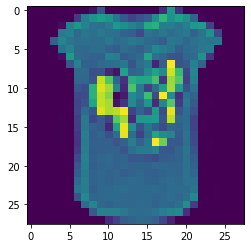

In [15]:
import random 
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
print(label)

## **View more image in a grid format**

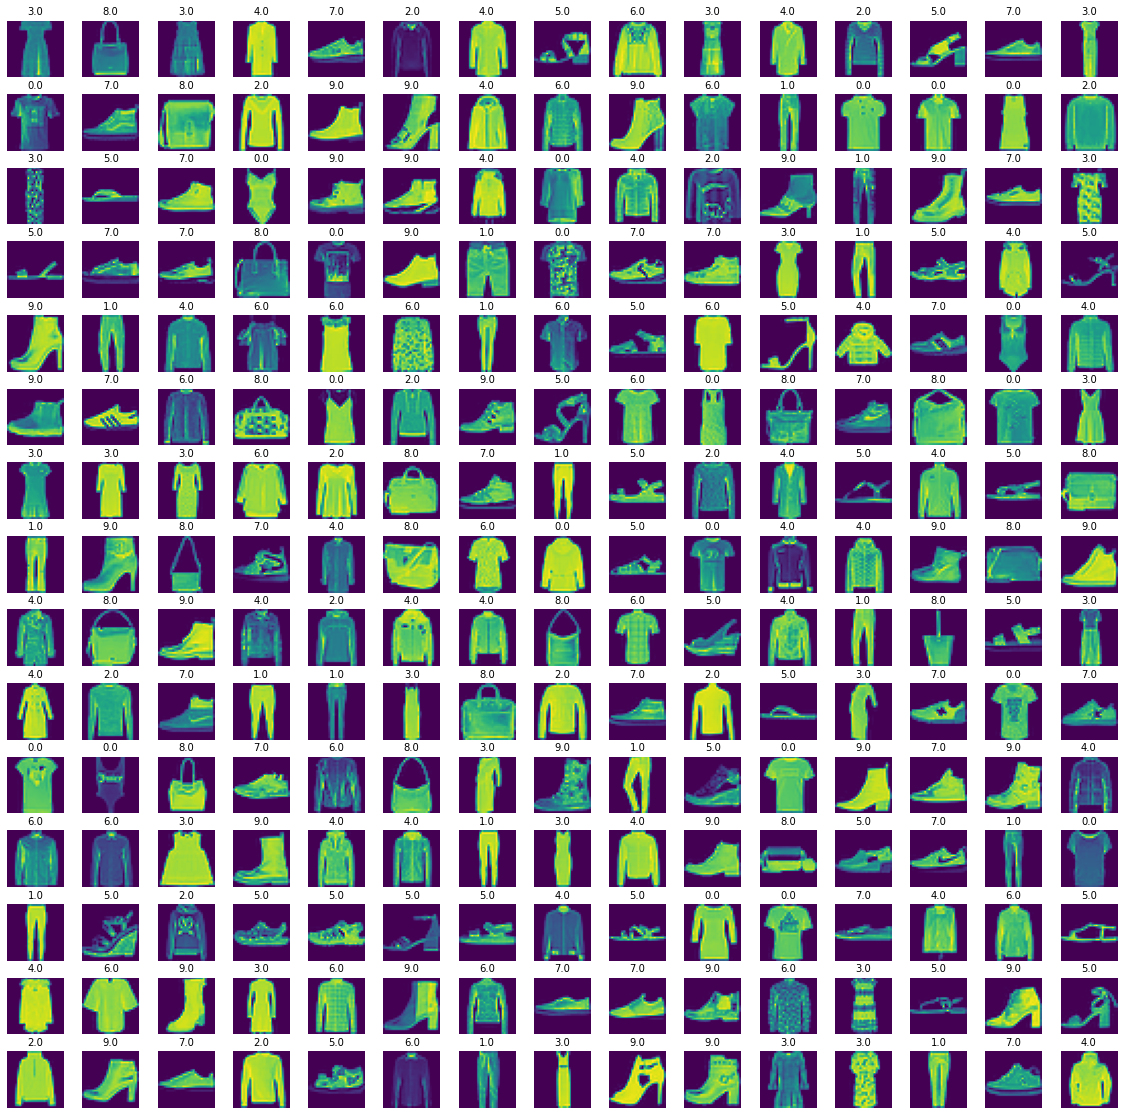

In [16]:
#Define the dimention of the plot grid 
w_grid=15
l_grid=15
fig, axes=plt.subplots(l_grid, w_grid, figsize=(20,20))
axes=axes.ravel() # flattern the 15x15 matrix into 255 array
n_training =len(training) # get the length of training dataset 
#select a random number from 0 to n_training
for i in np.arange(0,w_grid*l_grid):#create evenly space variables
  
  #select a random number from 0 to n_training 
  index=np.random.randint(0,n_training)
  #read and display the image with the selected index
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize=10)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)  
   

# **Data Partition**

In [17]:
X_train=training[:,1:]/255 #to normalize the data
y_train=training[:,0]
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validate,Y_train, Y_validate = train_test_split(X_train,y_train,test_size=0.2, random_state=1234)


**Take training, testing and validation data and put them in a form that can actually feed to our deep network.**

We have all our data in an array format and kind of matrix format. 
Now we need to reshape our data to be in a form of twenty eight by twenty eight by one.

Because thats the form that our convolutional neural network was going to accpeting the data.**

In [19]:
X_train=X_train.reshape(X_train.shape[0], *(28,28,1))
X_test=X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [23]:
#import open source nn libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [24]:
cnn_model=Sequential()

In [26]:
#32 kernals of 3 x 3 size and 
#the inpute image is 28x28x1, and the activation function is rectifire

cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1),activation='relu'))

#64 kernal of 3X3 size
#cnn_model.add(Conv2D(64,3,3, input_shape=(28,28,1), activation ='relu))

In [27]:
#add maxpooling layer 2x2 size
#maxpooling operation for 2D spatial data. Downsamples the input along its spatial dimensions (heightv and width)
# by taking the maximum value over an input window(of size defined by pool_size) for each channel of the input.
# Basically Max Pooling is an operation that is used to downsample the image if it is not used and replace it with 
#convolution to extrat the most important features.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#Flatten the model
#A flatten operation is a specific type of reshaping operations where by all of the axes are smooshed or squashed together. To flatten
# a tensor, we need to have at least two axes. This makes it so that we are starting  with something that is not already flat. 
#Basically flatten function used for flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer 
#and build your neural network model, then pass those data into every single neuron of the model effectively.
cnn_model.add(Flatten())


thats